# MODELE Z JEDNYM ATRYBUTEM

Zeszyt wykorzytany jest do stworzenia modeli na najbardziej istotnej statystycznie cesze i wizualizacja obliczonych prawdopodobieństw w przestrzeni $\mathbb{R^2}$.
Wykonano również wykresy prawdopodobieństwa dla funkcji logistycznej dzięki wyznaczonym parametrom.

# IMPORT POTRZEBNYCH BIBLIOTEK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()

D:\Programy\Anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# WCZYTANIE I ANALIZA DANYCH

In [2]:
raw_data = pd.read_csv('Data_for_UCI_named.csv')
data_mapped = raw_data.copy() 
data_mapped['stabf'] = data_mapped['stabf'].map({'unstable': 0, 'stable': 1})
data_mapped = data_mapped.drop(labels = 'stab', axis = 1)
data_mapped

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


## SPRAWDZENIE ISTOTNOŚĆI CECH POPRZEZ REGRESJĘ

In [3]:
data_temp = data_mapped.copy()
data_temp = data_temp.drop(['p1'], axis=1)
features_name = ['intercept','tau1', 'tau2', 'tau3', 'tau4','p2','p3','p4', 'g1', 'g2',
'g3', 'g4'] 
X = data_temp.drop('stabf', axis = 1)
y = data_temp['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_1 = sm.add_constant(X_train)
reg_log_1 = sm.Logit(y_train, x_1)
results_log_1 = reg_log_1.fit()
results_log_1.summary(xname = features_name)

Optimization terminated successfully.
         Current function value: 0.389262
         Iterations 7


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.4071
Time:                        19:54:10   Log-Likelihood:                -2724.8
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.9234      0.340     35.085      0.000      11.257      12.589
tau1          -0.3174      0.014    -23.381      0.000      -0.344      -0.291
tau2          -0.3231      0.014    -23.738      0.000      -0.350      -0.296
tau3          -0.3267      0.014    -23.924      0.000      -0.354      -0.300
tau4          -0.3370      0.014    -24.445      0.000      -0.364      -0.310
p2             0.0563      0.078      0.719      0.472      -0.097       0.210
p3            -0.1313      0.078     -1.675      0.094      -0.285       0.022
p4             0.1204      0.078      1.549      0.121      -0.032       0.273
g1            -2.7363      0.134    -20.470      0.000      -2.998      -2.474
g2            -2.9151      0.135    -21.648      0.000      -3.179      -2.651
g3            -2.9734      0.135    -21.987      0.000      -3.238      -2.708
g4            -2.8859      0.133    -21.619      0.000      -3.148      -2.624
==============================================================================
"""

##### W pracy zadziała się magia w intercepcie, najprawdopdobniej nie umiem przepisywać liczb :)

In [4]:
p_values = results_log_1.summary2().tables[1]['P>|z|']
p_values 

const    1.136714e-269
tau1     6.676004e-121
tau2     1.451483e-124
tau3     1.725659e-126
tau4     5.638742e-132
p2        4.720577e-01
p3        9.399546e-02
p4        1.214305e-01
g1        3.945734e-93
g2       6.348126e-104
g3       3.807494e-107
g4       1.200307e-103
Name: P>|z|, dtype: float64

# USUWANIE MOCY

In [5]:
data_with_p1 = data_mapped.copy()
data_without_p1 = data_with_p1.drop(['p1', 'p2', 'p3', 'p4'], axis=1)
data_without_p1

,tau1,tau2,tau3,tau4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,0.365246,0.587558,0.889118,0.818391,0


# REGRESJA LOGISTYCZNA

W tej sekcji przeprowadzenie regresji logistycznej służy znalezieniu najbardziej istotnej cechy. Do wyznaczenia cechy wykorzystane będzie p value.

In [6]:
from sklearn.model_selection import train_test_split

data = data_without_p1.copy()
features_name = ['intercept','tau1', 'tau2', 'tau3', 'tau4', 'g1', 'g2',
'g3', 'g4'] 
X = data.drop('stabf', axis = 1)
y = data['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
x_1 = sm.add_constant(X_train)
reg_log_1 = sm.Logit(y_train, x_1)
results_log_1 = reg_log_1.fit(method = 'newton')
results_log_1.summary(xname = features_name)

Optimization terminated successfully.
         Current function value: 0.389658
         Iterations 7


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.4065
Time:                        19:54:10   Log-Likelihood:                -2727.6
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.8535      0.298     39.831      0.000      11.270      12.437
tau1          -0.3165      0.014    -23.365      0.000      -0.343      -0.290
tau2          -0.3230      0.014    -23.742      0.000      -0.350      -0.296
tau3          -0.3266      0.014    -23.953      0.000      -0.353      -0.300
tau4          -0.3368      0.014    -24.444      0.000      -0.364      -0.310
g1            -2.7407      0.134    -20.507      0.000      -3.003      -2.479
g2            -2.9115      0.135    -21.641      0.000      -3.175      -2.648
g3            -2.9667      0.135    -21.967      0.000      -3.231      -2.702
g4            -2.8777      0.133    -21.588      0.000      -3.139      -2.616
==============================================================================
"""

In [7]:
from sklearn.model_selection import train_test_split

data = data_without_p1.copy()
features_name = ['intercept','tau1', 'tau2', 'tau3', 'tau4', 'g1', 'g2',
'g3', 'g4'] 
X = data.drop('stabf', axis = 1)
y = data['stabf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
x_1 = sm.add_constant(X_train)
reg_log_1 = sm.Logit(y_train, x_1)
results_log_1 = reg_log_1.fit()
results_log_1.summary(xname = features_name)

Optimization terminated successfully.
         Current function value: 0.389658
         Iterations 7


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.4065
Time:                        19:54:10   Log-Likelihood:                -2727.6
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.8535      0.298     39.831      0.000      11.270      12.437
tau1          -0.3165      0.014    -23.365      0.000      -0.343      -0.290
tau2          -0.3230      0.014    -23.742      0.000      -0.350      -0.296
tau3          -0.3266      0.014    -23.953      0.000      -0.353      -0.300
tau4          -0.3368      0.014    -24.444      0.000      -0.364      -0.310
g1            -2.7407      0.134    -20.507      0.000      -3.003      -2.479
g2            -2.9115      0.135    -21.641      0.000      -3.175      -2.648
g3            -2.9667      0.135    -21.967      0.000      -3.231      -2.702
g4            -2.8777      0.133    -21.588      0.000      -3.139      -2.616
==============================================================================
"""

Poniżej zbadano wartości p value w celu wyznaczenia najbardziej istotnej statystycznie cechy.

In [8]:
p_values = results_log_1.summary2().tables[1]['P>|z|']
p_values 

const     0.000000e+00
tau1     9.741459e-121
tau2     1.315438e-124
tau3     8.684090e-127
tau4     5.886738e-132
g1        1.848387e-93
g2       7.458429e-104
g3       5.946537e-107
g4       2.350984e-103
Name: P>|z|, dtype: float64

# MODEL Z TAU4

Wysoce istotną statystycznie cechą okazała się być cecha odnosząca się do czasu reakcji użytkownika czwartego na zmiany w sieci - tau4. Przy jej pomocy zbadano wartości częstości, wyznaczono funkcję prawdopoodbieństwa $\pi_1$ oraz wyznaczono prawdopodobieństwa dla wybranych przykładów uczących w modelach Lasu Losowego oraz SVM.

# CZĘSTOŚCI

Zbiór testowy podzielono na 35 przedziałów po 200 elementów w każdym. W każdym przedziale pobrano środkowy element i wyliczono częstość wystąpienia sieci stabilnej dla tego przedziału. Wyniki pokazano na wykresie.

In [9]:
X = data['tau4']
y = data['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_train = pd.concat([X_train, y_train], axis=1)
data_train = data_train.sort_values('tau4')
splitedSize = 200
data_train_splited = [data_train[x:x+splitedSize] for x in range(0, len(data_train), splitedSize)]

freq  = []
for elem in data_train_splited:
    freq.append(elem['stabf'].value_counts(normalize=True)[1])


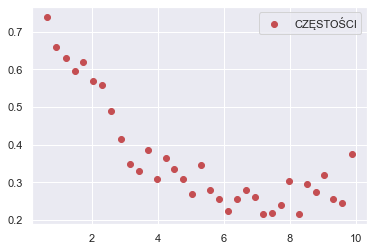

In [10]:
data_train_splited[1].iloc[100]['tau4']

middle_tau4 = []
middle_y = []
for i in range(len(data_train_splited)):
    middle_tau4.append(data_train_splited[i].iloc[splitedSize//2]['tau4'])
    middle_y.append(data_train_splited[i].iloc[splitedSize//2]['stabf'])

plt.plot(middle_tau4, freq, 'ro')
plt.legend(['CZĘSTOŚCI'])
plt.savefig("CZĘSTOŚCI.jpg")

# LOGIT

W tej sekcji przeprowadzono regresję logistyczną dla atrybutu tau4. W tych samych puntkach, co dla częstości wyznaczono prawdopodobieństwa według wzoru:
$$
\pi_1 = \frac{e^{\beta_0+\beta_1x}}{1 + e^{\beta_0+\beta_1x}}
$$

In [11]:
x_1 = sm.add_constant(X_train)
reg_log_1 = sm.Logit(y_train, x_1)
results_log_1 = reg_log_1.fit()
results_log_1.summary(xname = ['const','tau4'])

Optimization terminated successfully.
         Current function value: 0.626776
         Iterations 5


D:\Programy\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stabf   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6998
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                 0.04536
Time:                        19:54:10   Log-Likelihood:                -4387.4
converged:                       True   LL-Null:                       -4595.9
Covariance Type:            nonrobust   LLR p-value:                 1.137e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4218      0.054      7.838      0.000       0.316       0.527
tau4          -0.1907      0.010    -19.819      0.000      -0.210      -0.172
==============================================================================
"""

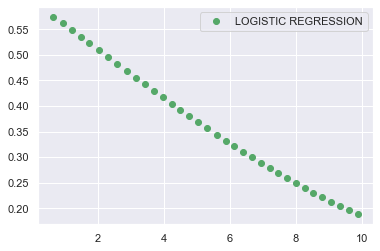

In [12]:
b0 = 0.4218
b1 = -0.1907


pi_log = []
for elem in middle_tau4:
    pi_log.append(math.exp(b0 + b1*elem)/(1+math.exp(b0 + b1*elem)))
    

plt.plot(middle_tau4, pi_log, 'go' )
plt.legend(["LOGISTIC REGRESSION"])
plt.savefig("LOGISTIC REGRESSION")

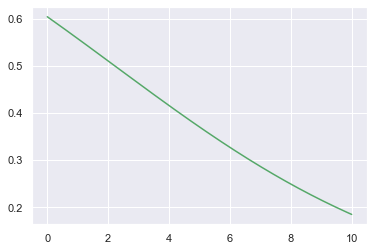

In [13]:
x = np.linspace(0, 10, 200)
fig = plt.figure() 
pi1 = np.exp(b0 + b1*x)/(1+np.exp(b0 + b1*x))
plt.plot(x,pi1, 'g-')
plt.savefig("CONT LOGISTIC REGRESSION")

Funckja wydaje się być liniowa, jednak na szerszym zakresie pokrywa się z oczekiwanym kształtem.

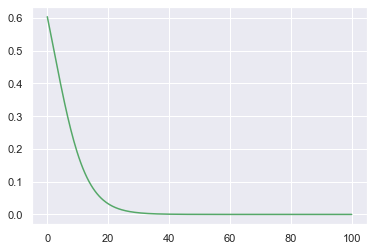

In [14]:
x = np.linspace(0, 100, 300)
fig = plt.figure() 
pi1 = np.exp(b0 + b1*x)/(1+np.exp(b0 + b1*x))
plt.plot(x, pi1, 'g-')
plt.savefig("CONST BIG LOGISTIC REGRESSION")

# LAS LOSOWY

Analogiczną procedurę przeprowadzono dla lasu losowego. Na początku wyestymowano model dzięki narzędziu RandomizedSearchCV.

In [15]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# max_depth = [int(x) for x in np.linspace(10, 110, 11)]
# max_depth.append(None)

# random_grid = {'n_estimators': [int(x) for x in np.linspace(200,2000,10)],
#                'max_features':  ['auto', 'sqrt'],
#                'max_depth': max_depth,
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4],
#                'bootstrap': [True, False]}



# middle_tau4 = np.array(middle_tau4)
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(middle_tau4.reshape(-1, 1), middle_y)
# rf_random.best_params_

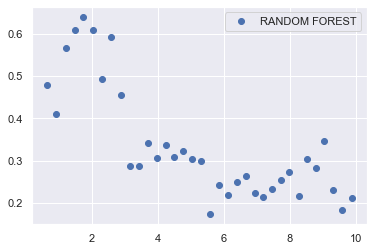

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=1600,
                                    min_samples_split = 2,
                                    min_samples_leaf = 4,
                                    max_features = 'sqrt',
                                    max_depth =  10,
                                    bootstrap = True,
                                    random_state = 42)
X_train = np.array(X_train)
middle_tau4 = np.array(middle_tau4)
clf_forest.fit(X_train.reshape(-1, 1), y_train)
pi_forest = clf_forest.predict_proba(middle_tau4.reshape(-1, 1))[:, 1]
plt.plot(middle_tau4, pi_forest, 'bo' )
plt.legend(["RANDOM FOREST"])
plt.savefig("RANDOM FOREST")

# SVM

In [17]:
from sklearn.svm import SVC

svm_clf = SVC(C= 1000, gamma= 0.01, kernel= 'rbf', random_state=42, probability = True)
X_train = np.array(X_train)
svm_clf.fit(X_train.reshape(-1,1), y_train)
pi_svm = svm_clf.predict_proba(middle_tau4.reshape(-1, 1))[:, 1]


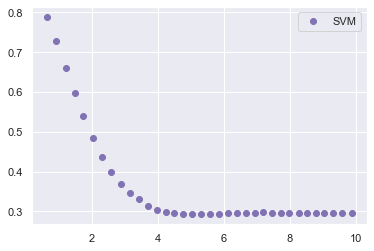

In [18]:
plt.plot(middle_tau4, pi_svm, 'mo')
plt.legend(["SVM"])
plt.savefig("SVM")

# WSZYTSKIE WYKRESY

Na koniec przedstawiono wszystkie wykresy na jednym układzie współrzędnych. Wszytskie wartości prawdopodobieństw i częstości zostały oszacowane dzięki środkowym wartościom przedziałów zbioru treningowego. 

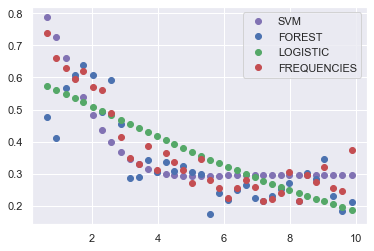

In [19]:
plt.plot(middle_tau4, pi_svm, 'mo')
plt.plot(middle_tau4, pi_forest, 'bo' )
plt.plot(middle_tau4, pi_log, 'go' )
plt.plot(middle_tau4, freq, 'ro')
plt.legend(["SVM", "FOREST", "LOGISTIC", "FREQUENCIES"])
plt.savefig("Wszystkie wykresy")